# 신경망

퍼셉트론으로 복잡한 함수도 표현이 가능해졌다. 하지만 가중치를 설정하는 작업은 여전히 사람이 수동으로 한다.

신경망은 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 신경망의 중요한 성질이다.

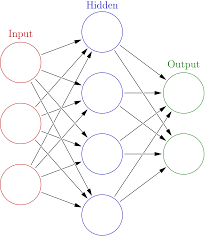

### 활성화 함수의 등장

입력 신호의 총합을 출력 신호로 변환하는 함수를 활성화 함수(activation function)라고 한다. 활성화 함수는 입력신호의 총합이 활성화를 일으키는지 정하는 역할을 한다.

### 시그모이드 함수

신경망에서 자주 사용되는 활성화 함수인 시그모이드(sigmoid) 함스를 나타내는 식이다
- $h(x) = \frac{1}{1+e^{-1}}$

신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고 그 변환된 신호를 다음 뉴런에 전달한다.

### 계단 함수와 시그모이드 함수

![](./NLP_1/img/IMG_5981A792CFAB-1.jpeg)


그래프를 보고 느껴지는 점은 '매끄러움'의 차이이다. 시그모이드 함수는 부드러운 곡선이며 압력에 따라 출력이 연속적으로 변화한다.
- 신경망에서는 연속적인 실수가 흐른다.

### 비선형 함수
신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다.
선형함수를 이용하면 **신경망의 층을 깊게 하는 의미가 없어진다.** 선형 함수의 문제는 층을 아무리 깊게 해도 '은닉층이 없는 네트워크' 로도 똑같이 기능을
할 수 있다는데있다.

선형함수인 $h(x) = cx$를 활성화 함수로 3층 네트워크를 만든다면 $y(x) = h(h(h(x)))$가 된다. 계산은
$y(x) = c \times c \times c \times x \rightarrow y(x) = ax$ 와 같은 식이다. $a = c^3$으로 치환해주면 된다.


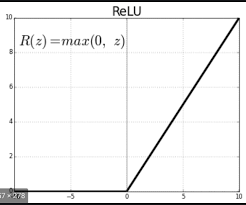

$h(x) = \Bigg\{\frac{x (x> 0)}{0(x\leq0)}  \Bigg\}$


### 춣력층 설계하기

신경망은 분류와 회귀 모두에 이용할 수 있다 다만 둘 중 어떤 문제냐에 따라 출력츨이 사용하는 함수가 달라진다 일반적으로 회귀에는 함등 함수를, 분류에는 소프트맥스를 사용한다.

항등함수는 입력과 출력이 항상 같다는 뜻의 함등이다.

![](/Users/taewoong/Documents/NLP_1/img/IMG_5EBE0E1440C4-1.jpeg)

SoftMax → $y_k = \frac{e^{a_k}}{\sum_{i=1}^n e^{a_i}}$

n은 출력층의 뉴런수, $y_k$는 그 중 k 번째 출력임을 뜻한다. 소프트맥스 함수의 분자는 입력신호 $a_k$의 지수함수, 분모는 모든 입력신호가 지수함수의 합으로 구성된다.

소프트맥스 함수의 출력을 '확률'로 해석할 수 있다. 소프트맥스의 출력의 총합은 1이다. 소프트맥스를 적용해도 원소의 대소관계는 변하지 않는다. 이는 지수함수
$y = e^x$가 단조 증가 함수이기 때문이다.

신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식한다.

기계학습의 문제 풀이는 학숩과 추론의 두 단계를 거쳐 이뤄진다. 학습단계에서 모델을 학습하고 추론 단계에서 앞서 학습한 모델을 미지의 데이터에 더해서 추론을 수행한다.

## 신경망 학습

학습이란 훈련데이터로부터 가중치 메개변수의 최적값을 자동으로 획득하는 것을 뜻한다.

### 데이터 주도 학습

기계학습에서는 사람의 개입을 최소화하고 수집한 데이터로 부터 패턴을 찾으려 시도한다.

딥러닝을 종단간 기계학습(end to end machine learning)이라고 부른다. 데이터에서 결과를 사람의 개입없이 얻는다는 뜻이다.

### 손실함수

신경망도 '하나의 지표'를 기준으로 최적의 매개변수 값을 탐색한다. 신경망 학습에서 사용하는 지표는 손실함수(loss function)라고 한다.

오차제곱합 → $E = \frac{1}{2} \sum_k(y_k - t_k)^2$

교차엔트로피 오차 → $E = -\sum_k t_k log(y_k)$

실질적으로 정답일때의 추정의 자연로그를 계산한다.
교차엔트로피 오차는 정답일때의 출력이 전제 값을 정하게 된다.

### 미니배치 학습

$E = -\frac{1}{N}\sum_n\sum_k t_{nk} log(y_{nk})$

N으로 나누어 정규화하고 있다. N으로 나눔으로써 '평균 손실 함수'를 구한다.

왜 손실할수를 설정하는가?
- 가중치 매개변수의 손실함수 미분이란 '가중치 매개변수값을 아주 조금씩 변화 시켰을 때, 손실함수가 어떻게 변하나' 라는 의미이다.
- 신경망을 학습할 때 정확동를 지표로 삼으면 안된다. 정확도를 지표로 하면 미분이 대부분의 장소에서 0이기 때문이다.


### 활성화 함수 계층 구하기


|ReLU|Sigmoid|
|--|--|
|![](https://blog.kakaocdn.net/dn/kZM5C/btqzhhOCX7u/fcWgVK4NDONy0EzhI4GFvK/img.png)|![](https://blog.kakaocdn.net/dn/Tbcdv/btqCqOiIovB/TPqwip21DxOpC70hSLjtCk/img.png)|
|순전파일때 입력의 x가 0보다 크면 역전파는 상류 값을 그대로 하류로 흘려보낸다.반면, 순전파 때 x가 0이하면 하류로 신호를 보내지 않는다.||

### 매개변수 갱신
신경망 학습의 목적은 손실함수의 값을 가능한 낮추는 매개변수를 찾는 것이다. 이는 곧 매개변수의 최적값을 탐색하는 문제이며 이러한 문제를 푸는 것을 **최적화**라 한다.

### 확률적 경사 하강법

$W \leftarrow W - \eta\frac{\delta L}{\delta w} $

W는 갱신할 가중치 매개변수고  $\frac{\delta L}{\delta w}$은 w에 대한 손실함수 기울기이다.

![](./NLP_1/img/IMG_E137BCC93331-1.jpeg)

SGD의 단점은 문제에 따라 비효율 적이다.

비등방성 함수(방향에 따라 성질, 즉 여기에서는 기울기가 달라지는) 에서는 탐색경로가 비효율적이다.

### 모멘텀

모멘텀은 운동향을 뜻하는 단어로 물리와 관계가 있다.

$v  \leftarrow av - \gamma\frac{\delta L}{\delta w}$

$W \leftarrow W + v$

v라는 새로운 변수가 나오는데, 이는 물리에서 말하는 속도에 해당한다. 기울기 방향으로 힘을 받아 물페가 가속된다는 물리법칙을 나타낸다.

![](/Users/taewoong/Documents/NLP_1/img/IMG_6700C0047708-1.jpeg)

SGD와 비교하면 지재그 정도가 덜한 것을 알수 있다. x축의 힘은 아주 작지만 방향이 변하지 않아서 일정하게 가속하기 때문이다. 거꾸로 y축의 힘은 크지만 위아래로 번갈아 가면서 상충하여 y축 방향의 속도는 안정적이지 않다.

### AdaGrad

신경망 학습에서는 학습률 값이 중요하다 이 값이 너무 작으면 학습 시간이 너무 길어지고 반대로 너무 크면
방산하여 학습이 제대로 이뤄지지 않는다. 이 학습률을 정하는 효과적인 기술로 학습률 감소가 있다. 이는 학습을 진행하면서 학습률을 점차 줄여가는 방법이다.

AdaGrad는 각각의 매개변수에 맞춤형 값을 만들어준다
AdaGrad는 개별 매개변수에 적응형으로 학습률을 조정 하면서 학습을 진행한다.

$h \leftarrow h + \frac{\delta L}{\delta W} \odot \frac{\delta L}{\delta W}$

$W \leftarrow W - \eta \frac{1}{\sqrt{h}} \frac{\delta L}{\delta W}$

h는 기존 기울기 값을 제곱하여 계속 더해준다 그리고 매개변수를 갱신할때 $\frac{1}{\sqrt{h}}$을 곱해서 학습률을 조정한다. 매개변수의 원소 중에서 많이 움직인 원소는 학습률이 낮아진다는 뜻이다.

AdaGrad는 과거의 기울기를 제곱하여 계속 더해간다 그래서 학습이 진행될 수 록 갱신 강도가 약해진다. 실제로 무한히 갱신하면 6순간 갱신량이 0이 되어서 전혀 갱신되지 않는다.
이 문제를 개선한 기법으로 RMSProp라는 방법이 있다.
RmsProp는 과거의 기울기를 균일하게 더해가는게 아니라 먼 과거의 기울기는 서서히 잊고 새로운 기울기 정보를 반영한다. 리르 지수 이동 평균이라 하며 과거의 기울기의 변영 규모를 기하급수적으로 감소시킨다.

![](/Users/taewoong/Documents/NLP_1/img/IMG_9DD295F067B6-1.jpeg)

최솟값을 향해 효쥴족으로 움직이는 것을 알 수 있다. y축 방향은 기울기가 커서 처음에는 움직이지만 큰 움직임에 비례해서 갱신 정도가 큰 폭으로 작아지도록 조정돤다.

### Adam

객관적으로 모멘텀과 AdaGrad를 융합한 듯한 방법이다.
하이퍼파라미터가 편향 보정이 진행된다.

![](/Users/taewoong/Documents/NLP_1/img/IMG_B4F46FD24D91-1.jpeg)

Adam은 파라미터를 3개 설정한다. 하나는 지금까지의 학습률 나머지 2개는 일차모멘텀용 게수 $\beta_1$와 이차 모멘텀용 계수 $\beta_2$이다.

![](/Users/taewoong/Documents/NLP_1/img/IMG_A5CDFB8EF77B-1.jpeg)


### 가중치의 초기값
가중치 감소는 단단히 말하자면 가중치 매개변수의 값이 작아지도록 학습하는 방법이다. 가중치의 값을 작게하여 오버피팅이 일어나지 않게하는 것이다.

활성화 값들이 치우쳤다는 것은 표현력 관점에서는 큰 문제가 있다는 것이다. 다수의 뉴런이 거의 같은 값을 출력하고 있으니 뉴런을 여러개둔 의미가 없어진다.
그래서 **활성화값들이 치우치면 표현력을 제한**한다는 관점에서 문제가 된다.

각 층의 활성화 값은 적당히 고루 분포해야한다. 층과 층 사이에 적당하게 다양한 데이터가 흐르게 해야 신경망 학습이 효율적으로 이워지기 때문이다.
반대로 치우친 데이터가 흐르면 기울기 손실이나 표현력에 제한 문제에 빠져서 학습이 잘 이뤄지지 않는 경우가 생긴다.

Xavier 초깃값은 일반적인 딥러닝 프레임워크들이 표준적으로 이용하고 있다.
앞계층의 노드가 n개라면 표준편차가 $\frac{1}{\sqrt{n}}$인 분포를 사용하면 된다는 결론을 이끌었다.

![](/Users/taewoong/Documents/NLP_1/img/IMG_ABAB88F01496-1.jpeg)


Xavier 초깃값은 활성화 함수가 신형인것을 전제로 이끈 결과이다. sigmoid 함수와 tanh 함수는 좌우대칭이라 중아 부근이 선형인 함수로 볼 수 있다.
그래서 Xavier 초깃값이 적당하다. 반면 ReLu를 이용할 때는 He 초깃값을 사용한다. He 초깃값은 표준편차가 $\sqrt\frac{2}{n}$인 정규분포를 사용한다./
ReLU는 음의 영역이 0이라서 더 넓게 분포시키기 위해 2배의 개수가 핋요하다고 해석할 수 있다.


### 배치정규화 알고리즘

* 학습을 빨리 진행할 수 있다.
* 초깃값에 크게 의존하지 않는다.
* 오버피팅을 억제한다.

데이터 분포를 정규화하는 '배치 정규화 계층'을 신경망에 삽입한다.

![](/Users/taewoong/Documents/NLP_1/img/IMG_EA01D612953C-1.jpeg)

배치정규화는 그 이름과 같이 학습시 미니배치를 단위로 정규화한다. 구체적으로 데이터 분포가 평균이 0, 분산이 1이 되도록 정규화한다.

$u_\beta \leftarrow \frac{1}{m} \sum_{i=1}^m x_i$

$\sigma^2_B \leftarrow \frac{1}{m} \sum_{i=1}^m (x_i - u_\beta)^2$

$\hat{x}_i \leftarrow \frac{x_i - u_\beta}{\sqrt{\sigma_\beta^2 + \epsilon}} $

미니배치 $B = \{x_1, x_2, \cdots, x_m\}$ 이라는 m개의 입력데이터의 집합에 대해 평균 $u_B$와 분산 $\sigma_B^2$을 구한다. 그리고 입력데이터를 평군이 0, 분산이 1이되게 정규화한다.
$\epsilon$ 기호는 작은 값으로 0으로 나누는 사태를 예방하기 위한 것이다.

활성화 함수의 앞에 삽입함으러써 데이터 분포가 덜 치우치게 할 수 있다.
또, 배치 정규화마다 정규화된 데이터에 확대와 이동 변환을 수행한다.

$y_i \leftarrow \gamma \hat{x}_i + B $

이 식에서 $\gamma$가 확대를, $B$가 이동을 담당한다. 두 값은 처음에는 $\gamma = 1, B = 0 $부터 시작하고 학습하면서 적합한 값으로 조정해간다.

![](https://mblogthumb-phinf.pstatic.net/MjAyMDAxMjlfMTg2/MDAxNTgwMjg0NDExOTUy._31NTMY36d0FM8MK-MfOT1WwDNjapvpkaCB_eW1mvyIg.FZqBmXpo3FKq-uarG7bL49QKw-FwiyXJhVG79TI34zIg.PNG.kkang9901/image.png?type=w800)


### 오버피팅

오버피팅은 주로 다음의 두 경우에 일어난다.
* 매개변수가 많고 표현력이 높은 모델
* 훈련 데이터가 적을 경우

### 가중치 감소

오버피팅 억제용으로 예로부터 많이 사용해온 가중치 감소 방법이다. 학습과정에서 큰 가중치에 대해서 그에 상응하는 큰 패널티를 부과하여 오버피팅을 억제하는 방법이다.

### 드롭아웃

신경망 모델이 복잡해지면 가중치 감소만으로 대응하기 어려워진다 이럴 때는 흔히 드롭아웃이라는 기법을 이용한다. 드롭아웃은 뉴런을 임의로 삭제하면서 학습하는 방법이다.
훈련 때는 데이터를 흘릴떄 마나 삭제한 뉴런을 무작위로 선택하고, 시험 때는 모든 뉴런에 신호를 전달한다.

![](https://lh3.googleusercontent.com/proxy/Q1-3Sal7bsPstfN8B7LFKJq1dgSqUicMQRM9assQCPAQNPXPD6qsOZ4lVaXFvu0IgPASowBL0MmSL1EZB8K35_zAN0sT_dVsHPXkr0TjC2EJAMgyNA)

